# Assignment 02 – Generative and Non-Generative Methods

#### Team number - Landon Carpenter - lc1276

# Initialization 

## Load the dataset. (0.5 x 2)

In [15]:
import urllib.request
# url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv'
# filename = 'datasets/online_shoppers_intention.csv'
# shopper = urllib.request.urlretrieve(url, filename)

In [10]:
import requests

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv'
filename = 'osi.csv'

response = requests.get(url)

if response.status_code == 200:
    with open(filename, 'wb') as file:
        file.write(response.content)
else:
    print(f"Failed getting: {url}")


## Show first 6 data points using head(). (0.5 x 2)

In [11]:
import pandas as pd
filename = 'osi.csv'
OSI = pd.read_csv(filename, header=0)
OSI["Weekend"] = OSI["Weekend"].astype(int)
OSI["Revenue"] = OSI["Revenue"].astype(int)
OSI.insert(loc=16, column="VisitorTypeNumeric", value=pd.factorize(OSI['VisitorType'])[0] + 1)
OSI = OSI.drop('VisitorType', 1)

OSI.head(6)

D:\Users\carpenterl\AppData\Local\Temp\1\ipykernel_8984\444034493.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  OSI = OSI.drop('VisitorType', 1)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorTypeNumeric,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,1,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,1,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,1,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,1,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,1,1,0
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,1,0,0


## Describe the Dataframe by using describe. (0.5 x 2) 

In [12]:
OSI.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,VisitorTypeNumeric,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586,1.151176,0.232603,0.154745
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169,0.376989,0.422509,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,1.000000,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,1.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,3.000000,1.000000,1.000000


## Show correlation heat plot of the entire dataset using matplotlib and sns, choose any color pallet (except blue) you like (experiment). (0.5 x 2) 

D:\Users\carpenterl\AppData\Local\Temp\1\ipykernel_8984\534302438.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = OSI.corr()


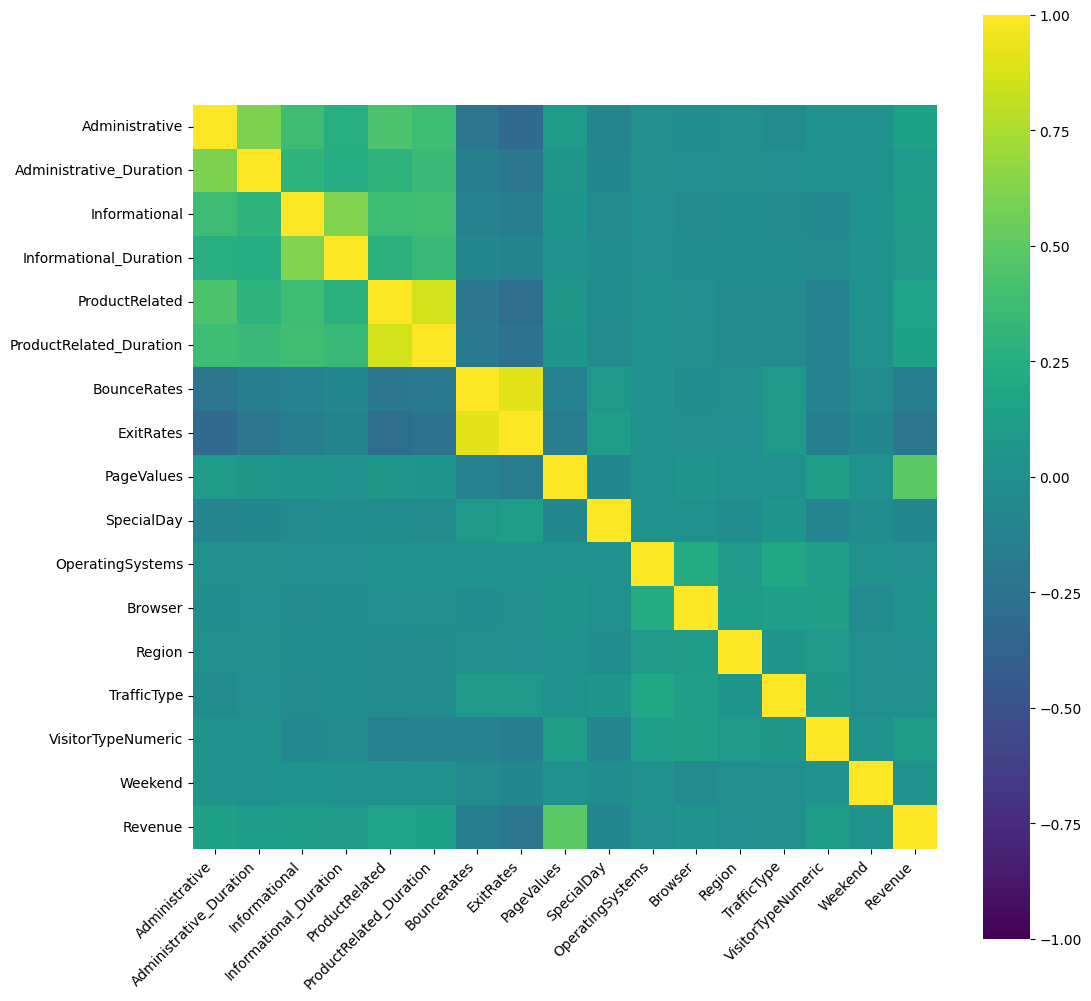

In [14]:
from matplotlib import rcParams
import seaborn as sns

rcParams['figure.figsize'] = 12,12
rcParams['figure.dpi'] = 100
corr = OSI.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.color_palette("viridis", as_cmap=True),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## Show the distribution plots of each variable using hist function from pandas+matplotlib. Also, experiment with visual aspects of the image (not a lot, but an excellent visual will always leave a better impression. you can change color, thickness, font, font size, font color, etc.). Explain the plot distributions as much as you can. For example, you can describe the attributes of the distributions like *“From the distribution plot of variable x we can see that the mean is xx with std dev of yy and the variable seems to be skewed towards left.”* (0.5 x 2) 


In [40]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(12, 12),dpi=150)
# OSI.hist()

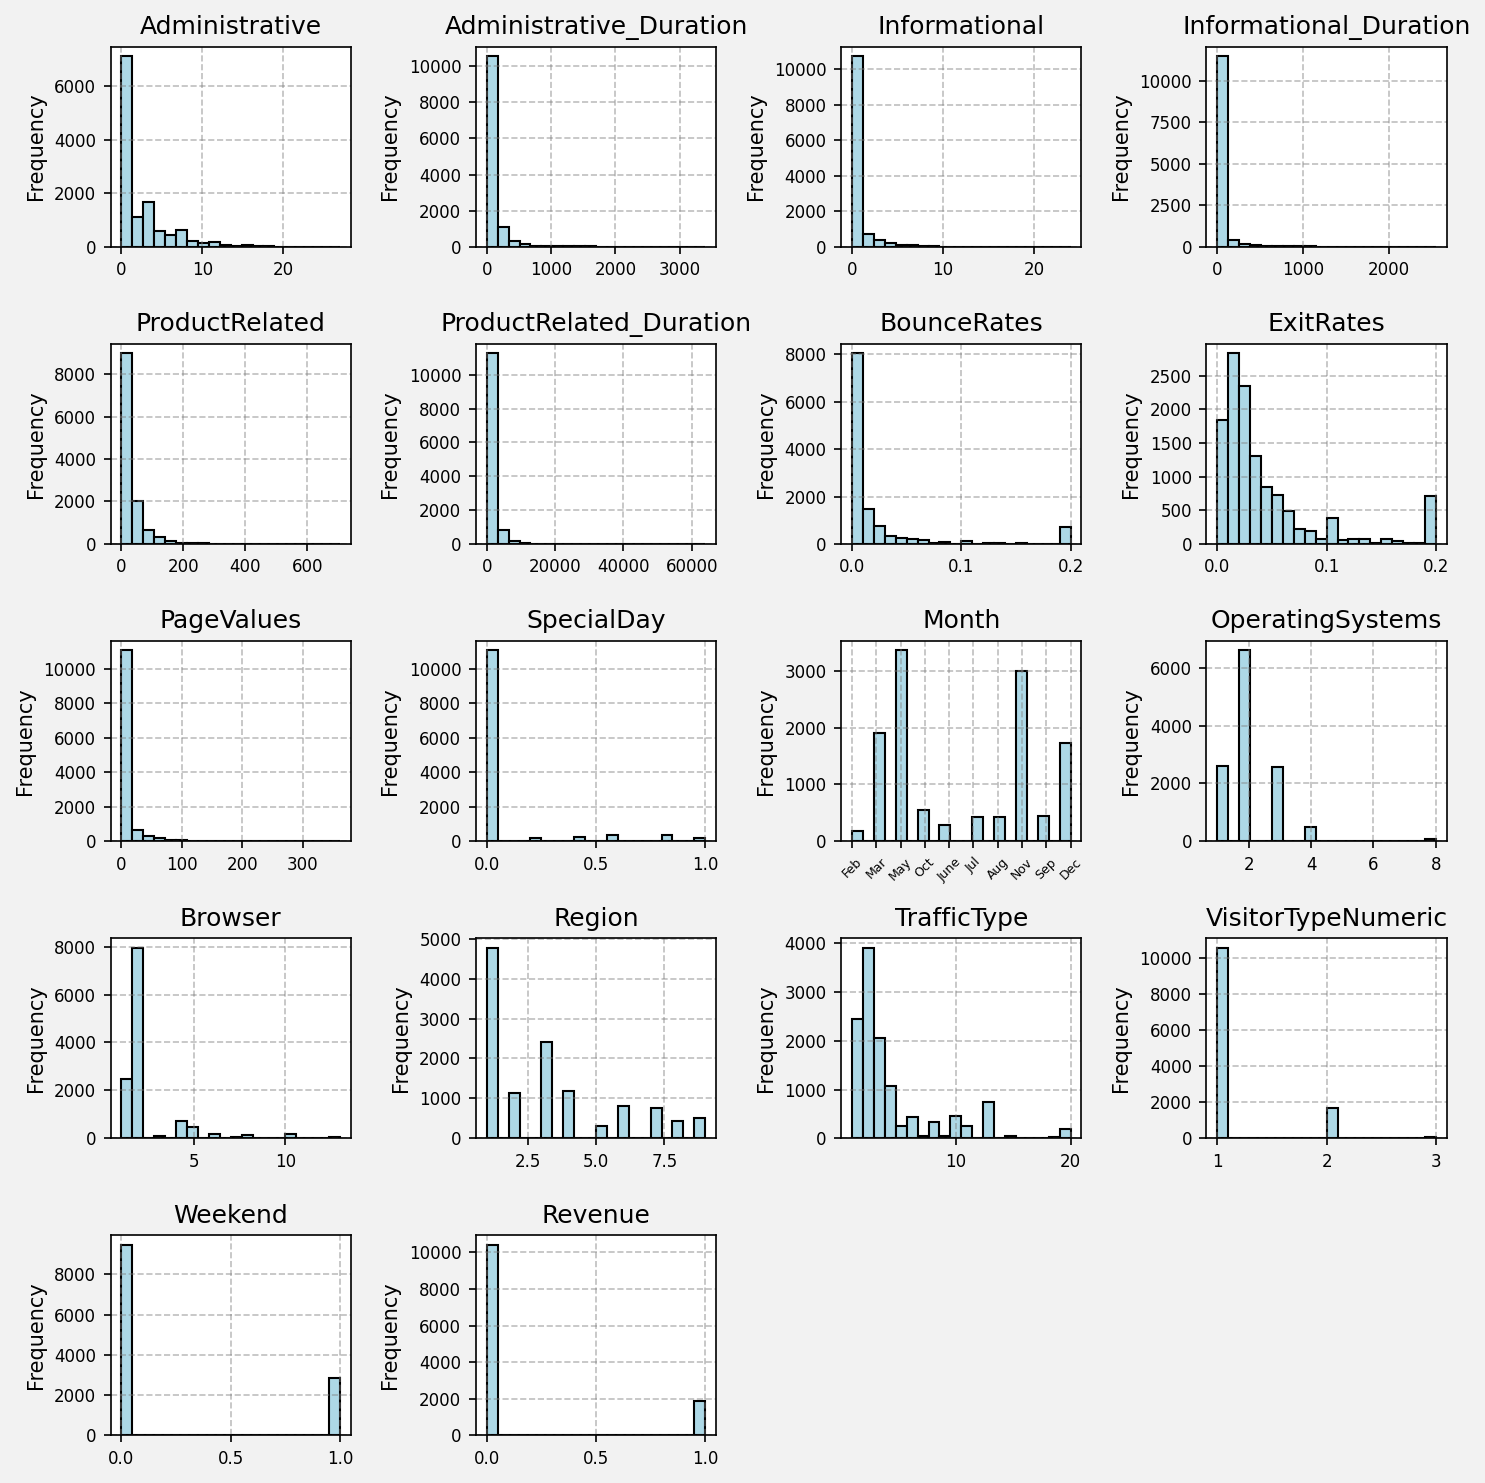

In [39]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have loaded your DataFrame OSI

# Calculate the number of rows and columns based on the number of columns in OSI
num_cols = len(OSI.columns)
num_rows = (num_cols + 3) // 4  # Create a 4-column grid

# Set up the subplots with the calculated number of rows and columns
fig, axes = plt.subplots(num_rows, 4, figsize=(10, 10), dpi=150)

# Flatten the axes array for easier iteration
axes = axes.ravel()

# Loop through the columns and create histograms
for i, column in enumerate(OSI.columns):
    if i < num_cols:
        OSI[column].hist(ax=axes[i], bins=20, color='lightblue', edgecolor='black')  # Adjust histogram appearance
        axes[i].set_title(column, fontsize=12)
        #axes[i].set_xlabel(column, fontsize=10)
        axes[i].set_ylabel("Frequency", fontsize=10)
        axes[i].tick_params(labelsize=8)
        if i == 10:
            axes[i].tick_params(axis='x', rotation=45, labelsize=6)
        
        # Add grid lines
        axes[i].grid(True, linestyle='--', alpha=0.5, color='gray')
    else:
        fig.delaxes(axes[i])  # Remove any extra empty subplots

# Set a gray background for the entire figure
fig.patch.set_facecolor('#f2f2f2')

# Adjust layout for better spacing between subplots
plt.tight_layout()

fig.delaxes(axes[-1])  # Remove last plot (empty)
fig.delaxes(axes[-2])  # Remove second to last plot (empty)

# Show the plots
plt.show()


Explanation for the histogram plots above:

For the most part these histograms show the occurance of values for each column name. For example 'Revenue' is true 2,000 times, but false nearly 10,000. With that said the insights are mostly just showing what the distribution I described previously are like. For example 'Administrative' has a mean around 2.3 and a standard deviation around 3.3. This means that the majority of the values are between 0 and 5. The same information can be gathered from most other columns depending on the type of the information. One notable histgram is the month catagory that seems to spike around the holidays. 

## Load the dataset. (0.5 x 2)

In [41]:
import pandas as pd
filename = 'datasets/Bike-Sharing-Hour.csv'
BSH = pd.read_csv(filename, header=0)


url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv'
filename = 'osi.csv'

response = requests.get(url)

if response.status_code == 200:
    with open(filename, 'wb') as file:
        file.write(response.content)
else:
    print(f"Failed getting: {url}")

FileNotFoundError: [Errno 2] No such file or directory: 'datasets/Bike-Sharing-Hour.csv'

## Show first 6 data points using head(). (0.5 x 2)

In [80]:
import pandas as pd
BSH.head(6)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1


## Describe the Dataframe by using describe. (0.5 x 2) 

In [81]:
BSH.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## Show correlation heat plot of the entire dataset using matplotlib and sns, choose any color pallet (except blue) you like (experiment). (0.5 x 2) 

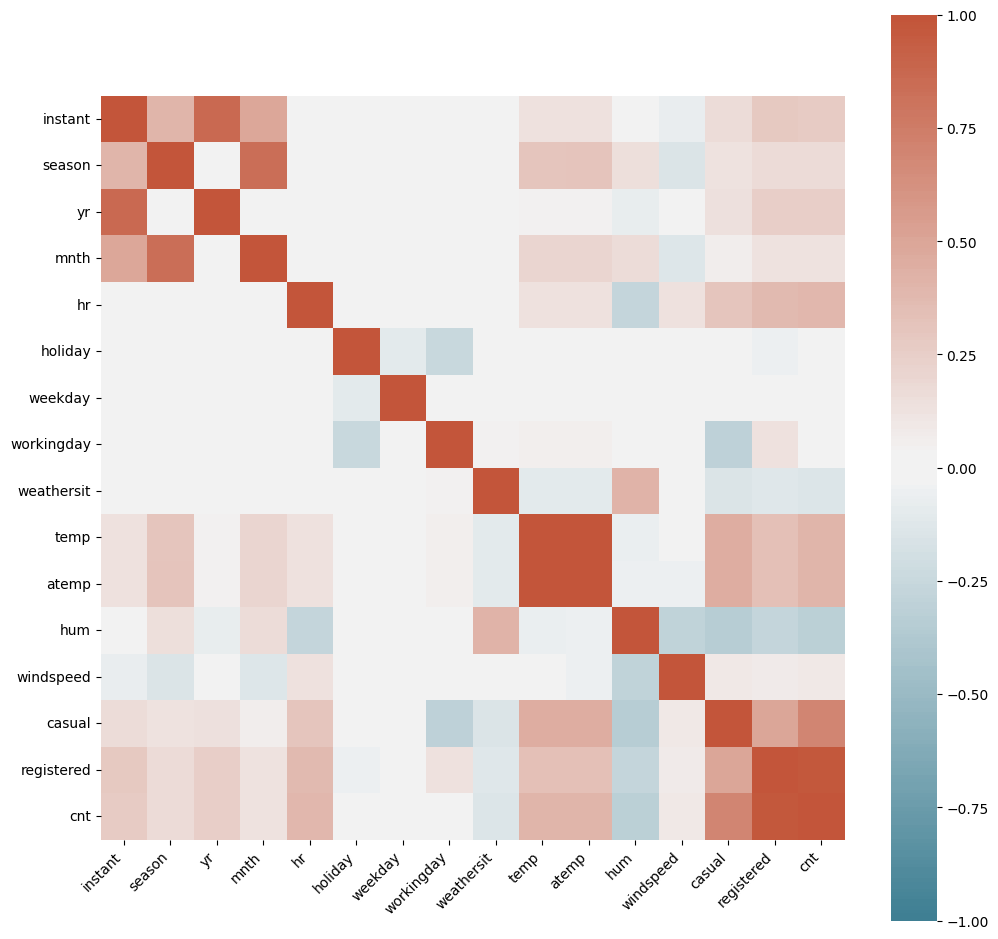

In [82]:
from matplotlib import rcParams
import seaborn as sns

rcParams['figure.figsize'] = 12,12
rcParams['figure.dpi'] = 100
corr = BSH.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(220, 20, sep=10, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## Show the distribution plots of each variable using hist function from pandas+matplotlib. Also, experiment with visual aspects of the image (not a lot, but an excellent visual will always leave a better impression. you can change color, thickness, font, font size, font color, etc.). Explain the plot distributions as much as you can. For example, you can describe the attributes of the distributions like *“From the distribution plot of variable x we can see that the mean is xx with std dev of yy and the variable seems to be skewed towards left.”* (0.5 x 2) 


array([[<AxesSubplot:title={'center':'instant'}>,
        <AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'yr'}>,
        <AxesSubplot:title={'center':'mnth'}>],
       [<AxesSubplot:title={'center':'hr'}>,
        <AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'weekday'}>,
        <AxesSubplot:title={'center':'workingday'}>],
       [<AxesSubplot:title={'center':'weathersit'}>,
        <AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>,
        <AxesSubplot:title={'center':'hum'}>],
       [<AxesSubplot:title={'center':'windspeed'}>,
        <AxesSubplot:title={'center':'casual'}>,
        <AxesSubplot:title={'center':'registered'}>,
        <AxesSubplot:title={'center':'cnt'}>]], dtype=object)

<Figure size 1800x1800 with 0 Axes>

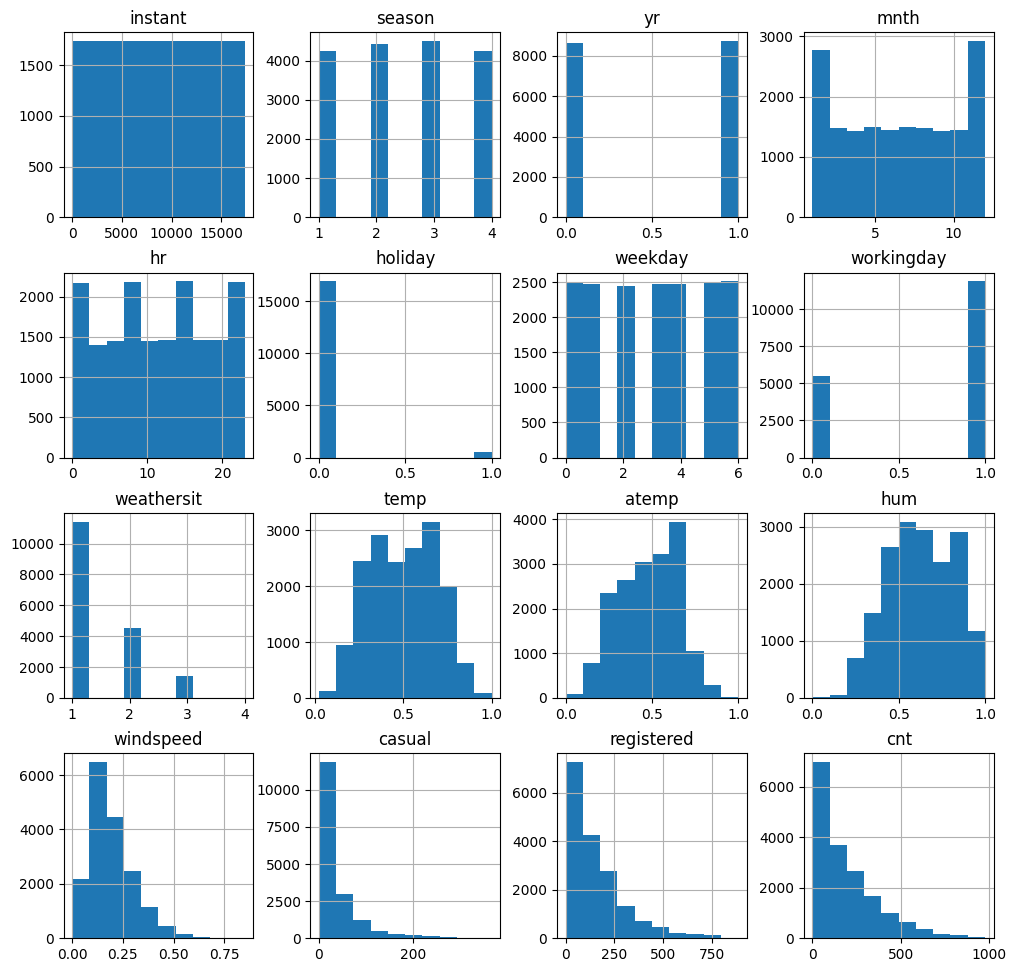

In [83]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12),dpi=150)
BSH.hist()

# Intermediate Steps (Essential, no points granted)

In [84]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

X_OSI = OSI.loc[:, OSI.columns != 'Revenue'].to_numpy()
y_OSI = OSI.iloc[:,-1:].to_numpy()

# print(X_OSI)
# print(Y_OSI)


OSIX_train, OSIX_test, OSIy_train, OSIy_test = train_test_split(X_OSI, y_OSI, test_size=0.30, random_state=0)

In [85]:
X_BSH = BSH.loc[:, BSH.columns != 'cnt'].to_numpy()
y_BSH = BSH.iloc[:,-1:].to_numpy()

# print(X_BSH)
# print(Y_BSH)

BSHX_train, BSHX_test, BSHy_train, BSHy_test = train_test_split(X_BSH, y_BSH, test_size=0.30, random_state=0)

# Classification (total 48)
## AdaBoost

### Import appropriate algorithm from scikit-learn and explain what you did. (1.5)

In [86]:
from sklearn.ensemble import AdaBoostClassifier

### Create the appropriate classifier and describe what the syntax represents and what parameters you choose (1.5)

In [87]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)


### Train classifier on train data and explain what you did. (1.5) 

In [88]:
ada_fit = clf.fit(OSIX_train, OSIy_train)

C:\Program Files\Python38\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Test/fit classifier test data and explain what you did. (1.5)

In [89]:
OSIy_pred = ada_fit.predict(OSIX_test)

### Calculate accuracy and explain what you did. (1.5)

In [90]:

print(classification_report(OSIy_test, OSIy_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      3077
           1       0.67      0.54      0.60       622

    accuracy                           0.88      3699
   macro avg       0.79      0.74      0.76      3699
weighted avg       0.87      0.88      0.87      3699



### Show both text and visual confusion Matrices using scikit learn and matplotlib and explain what the graph tells you and what you did. (2.5) 


<Figure size 187.5x187.5 with 0 Axes>

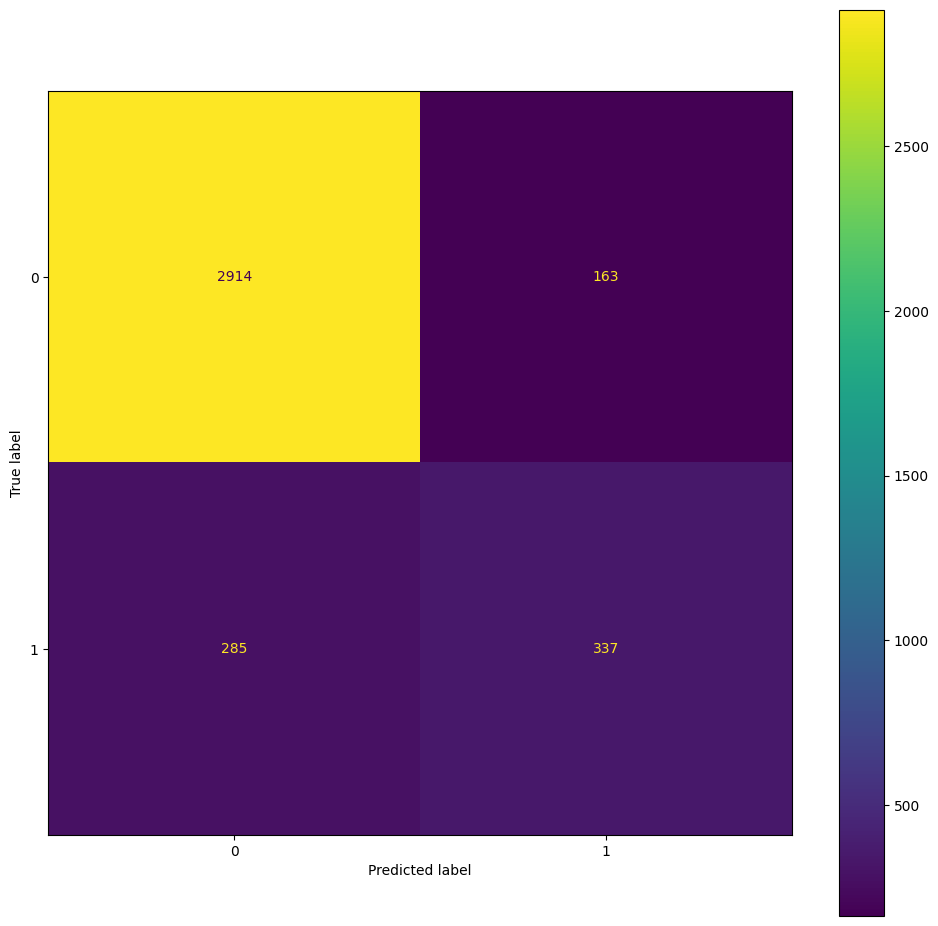

In [93]:
from sklearn.metrics import ConfusionMatrixDisplay
from seaborn import set_palette

plt.figure(figsize=(2.5,2.5),dpi=75)
set_palette("Paired")

conf_matrix = confusion_matrix(OSIy_test, OSIy_pred)
ConfusionMatrixDisplay.from_estimator(ada_fit, OSIX_test, OSIy_test)

### Repeat the same with a different parameter set and compare the result with (2)


## Gradient Boost

### Import appropriate algorithm from scikit-learn and explain what you did. (1.5)

### Create the appropriate classifier and describe what the syntax represents and what parameters you choose (1.5)

### Train classifier on train data and explain what you did. (1.5) 

### Test/fit classifier test data and explain what you did. (1.5)

### Calculate accuracy and explain what you did. (1.5)

### Show both text and visual confusion Matrices using scikit learn and matplotlib and explain what the graph tells you and what you did. (2.5) 


### Repeat the same with a different parameter set and compare the result with (2)


## XG Boost

### Import appropriate algorithm from scikit-learn and explain what you did. (1.5)

### Create the appropriate classifier and describe what the syntax represents and what parameters you choose (1.5)

### Train classifier on train data and explain what you did. (1.5) 

### Test/fit classifier test data and explain what you did. (1.5)

### Calculate accuracy and explain what you did. (1.5)

### Show both text and visual confusion Matrices using scikit learn and matplotlib and explain what the graph tells you and what you did. (2.5) 


### Repeat the same with a different parameter set and compare the result with (2)


## Bagging
### Import appropriate algorithm from scikit-learn and explain what you did. (1.5)

### Create the appropriate classifier and describe what the syntax represents and what parameters you choose (1.5)

### Train classifier on train data and explain what you did. (1.5) 

### Test/fit classifier test data and explain what you did. (1.5)

### Calculate accuracy and explain what you did. (1.5)

### Show both text and visual confusion Matrices using scikit learn and matplotlib and explain what the graph tells you and what you did. (2.5) 


### Repeat the same with a different parameter set and compare the result with (2)


# Regression (22 Points)
## Gradient Boost

### Import appropriate algorithm from scikit-learn and explain what you did. (1.5)

### Create the appropriate classifier and describe what the syntax represents and what parameters you choose (1.5)

### Train classifier on train data and explain what you did. (1.5) 

### Test/fit classifier test data and explain what you did. (1.5)

### Calculate accuracy and explain what you did. (1.5)

### Show both text and visual confusion Matrices using scikit learn and matplotlib and explain what the graph tells you and what you did. (2.5) 


### Repeat the same with a different parameter set and compare the result with (2)


## XG Boost

### Import appropriate algorithm from scikit-learn and explain what you did. (1.5)

### Create the appropriate classifier and describe what the syntax represents and what parameters you choose (1.5)

### Train classifier on train data and explain what you did. (1.5) 

### Test/fit classifier test data and explain what you did. (1.5)

### Calculate accuracy and explain what you did. (1.5)

### Show both text and visual confusion Matrices using scikit learn and matplotlib and explain what the graph tells you and what you did. (2.5) 


### Repeat the same with a different parameter set and compare the result with (2)


## Bagging

### Import appropriate algorithm from scikit-learn and explain what you did. (1.5)

### Create the appropriate classifier and describe what the syntax represents and what parameters you choose (1.5)

### Train classifier on train data and explain what you did. (1.5) 

### Test/fit classifier test data and explain what you did. (1.5)

### Calculate accuracy and explain what you did. (1.5)

### Show both text and visual confusion Matrices using scikit learn and matplotlib and explain what the graph tells you and what you did. (2.5) 


### Repeat the same with a different parameter set and compare the result with (2)


# Bonus Question (5)
For all the given classifiers (Q3), evaluate the different parameter sets including (njobs, learning rate, etc).

## For boosting and bagging compare the tradeoff between njobs and learning rate. Plot the graph of different learning rates vs number of jobs(label the plot correctly. It should show title, x and y tik labels, and x and y axis labels). (1)

## Explain the graph in details, specifically describe the trade off between thelearning rate and n jobs. Also comment on the eolution of error for each combination(1 paragraph at least, 1.5).

## For bagging compare the tradeoff between the bootstrap features and max samples. Plot the graph of different combination of bootstrap features and max samples (label the plot correctly. It should show title, x and y tik labels, and x and y axis labels). (1)

## Explain the graph in details, specifically describe the trade off between bootstrap features and max samples (1 paragraph at least, 1.5) 